In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader



In [20]:
df = pd.read_csv('steam_user.csv')
print (df.head())

   151603712  The Elder Scrolls V Skyrim  purchase    1.0  0
0  151603712  The Elder Scrolls V Skyrim      play  273.0  0
1  151603712                   Fallout 4  purchase    1.0  0
2  151603712                   Fallout 4      play   87.0  0
3  151603712                       Spore  purchase    1.0  0
4  151603712                       Spore      play   14.9  0


In [21]:
# Присваиваем названия колонкам
df.columns = ['user_id', 'game_name', 'action', 'play_hours', 'to_delete']

# Удаляем пятую колонку
df = df.drop(columns=['to_delete'])

# Считаем уникальные значения для user_id и game_name
unique_user_ids = df['user_id'].nunique()
unique_game_names = df['game_name'].nunique()

# Выводим результаты
print(f"Уникальные user_id: {unique_user_ids}")
print(f"Уникальные game_name: {unique_game_names}")

Уникальные user_id: 12393
Уникальные game_name: 5155


In [22]:
game_df = pd.read_csv('games.csv')

In [23]:
game_df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [24]:
merged_df = pd.merge(df, game_df, left_on='game_name', right_on='name', how='inner')

In [25]:
merged_df.shape

(92883, 22)

In [26]:
merged_df.isna().sum()

user_id              0
game_name            0
action               0
play_hours           0
appid                0
name                 0
release_date         0
english              0
developer            0
publisher           11
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [27]:
unique_user_ids = merged_df['user_id'].nunique()
unique_game_names = merged_df['game_name'].nunique()


print(f"Уникальные user_id: {unique_user_ids}")
print(f"Уникальные game_name: {unique_game_names}")

Уникальные user_id: 10121
Уникальные game_name: 2190


In [28]:
df = merged_df.drop(columns=['game_name'])

In [29]:
df['publisher'].fillna('unknown', inplace=True)

C:\Users\ereme\AppData\Local\Temp\ipykernel_36660\309628549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['publisher'].fillna('unknown', inplace=True)


In [30]:
df.isna().sum()

user_id             0
action              0
play_hours          0
appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [31]:
multi_value_columns = ['genres', 'categories', 'steamspy_tags']

def split_and_create_dummies(df, column, separator=';', prefix=None):
    split_data = df[column].str.get_dummies(sep=separator)
    
    if prefix:
        split_data = split_data.add_prefix(f'{prefix}_')
    
    df = pd.concat([df, split_data], axis=1)
    return df

for col in multi_value_columns:
    df = split_and_create_dummies(df, col, separator=';', prefix=col)

df.head()

,user_id,action,play_hours,appid,name,release_date,english,developer,publisher,platforms,...,steamspy_tags_War,steamspy_tags_Wargame,steamspy_tags_Warhammer 40K,steamspy_tags_Web Publishing,steamspy_tags_Werewolves,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Zombies
0,151603712,purchase,1.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,windows,...,0,0,0,0,0,0,0,0,0,0
1,151603712,play,87.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,windows,...,0,0,0,0,0,0,0,0,0,0
2,151603712,purchase,1.0,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,...,0,0,0,0,0,0,0,0,0,1
3,151603712,play,8.9,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,...,0,0,0,0,0,0,0,0,0,1
4,151603712,purchase,1.0,339800,HuniePop,2015-01-19,1,HuniePot,HuniePot,windows;mac;linux,...,0,0,0,0,0,0,0,0,0,0


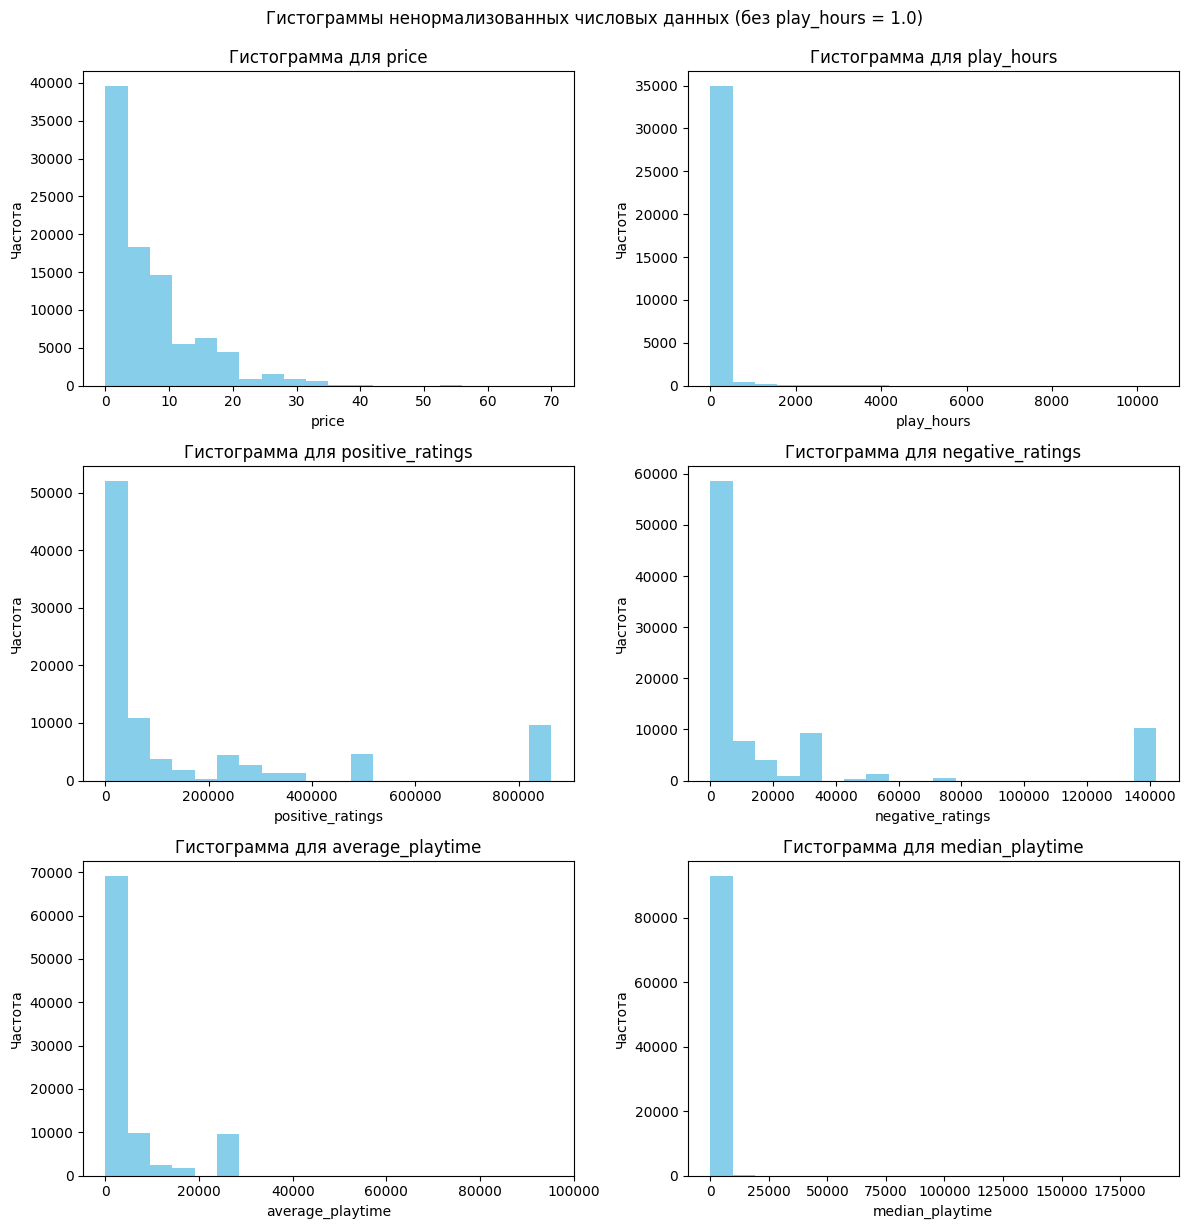

In [32]:
numerical_columns = ['price', 'play_hours', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime']
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 ряда, 2 колонки
axes = axes.ravel()

for i, col in enumerate(numerical_columns):
    if col == 'play_hours':
        # Исключаем значения, равные 1.0 (это покупка)
        data = df[col][df[col] != 1.0].dropna()
    else:
        data = df[col].dropna()
    
    axes[i].hist(data, bins=20, color='skyblue')
    axes[i].set_title(f"Гистограмма для {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Частота")

plt.tight_layout()
plt.suptitle("Гистограммы ненормализованных числовых данных (без play_hours = 1.0)", y=1.02)
plt.show()



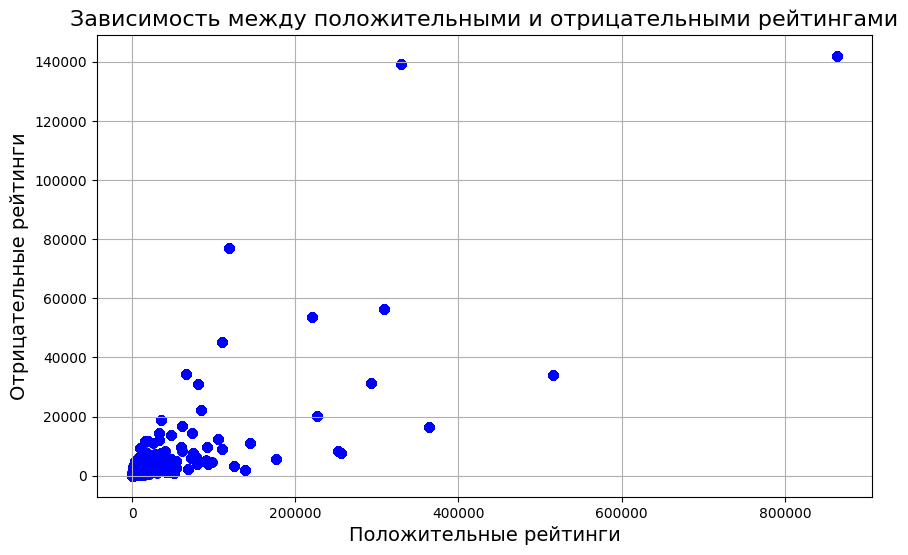

In [33]:
plt.figure(figsize=(10, 6))

plt.scatter(df['positive_ratings'], df['negative_ratings'], alpha=0.5, color='blue')

plt.title('Зависимость между положительными и отрицательными рейтингами', fontsize=16)
plt.xlabel('Положительные рейтинги', fontsize=14)
plt.ylabel('Отрицательные рейтинги', fontsize=14)
plt.grid(True)

plt.show()


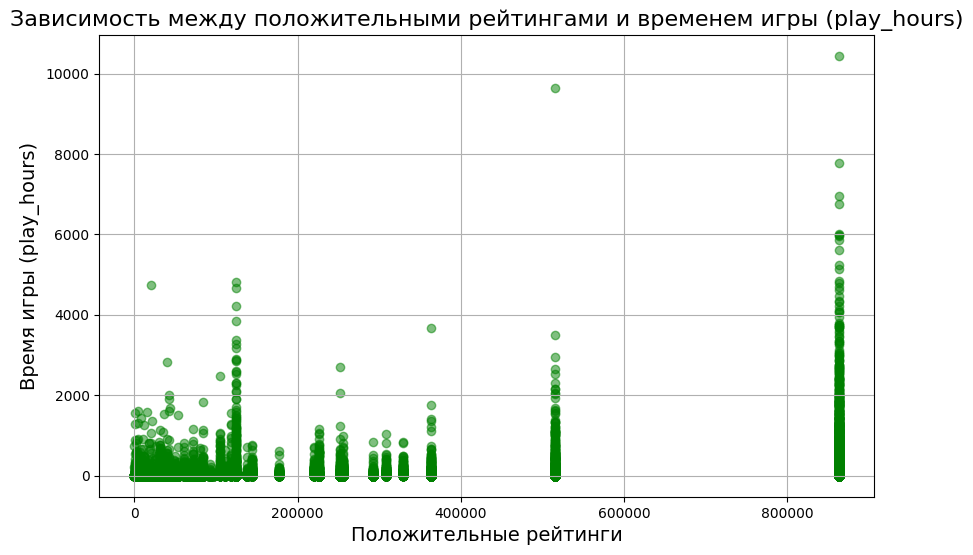

In [34]:
filtered_df = df[df['play_hours'] != 1.0]

plt.figure(figsize=(10, 6))

plt.scatter(filtered_df['positive_ratings'], filtered_df['play_hours'], alpha=0.5, color='green')

plt.title('Зависимость между положительными рейтингами и временем игры (play_hours)', fontsize=16)
plt.xlabel('Положительные рейтинги', fontsize=14)
plt.ylabel('Время игры (play_hours)', fontsize=14)
plt.grid(True)

plt.show()



In [35]:
merged_df

,user_id,game_name,action,play_hours,appid,name,release_date,english,developer,publisher,...,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,151603712,Fallout 4,purchase,1.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84,110376,45377,4822,2904,5000000-10000000,19.99
1,151603712,Fallout 4,play,87.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,...,Single-player;Steam Achievements;Full controll...,RPG,Open World;Post-apocalyptic;Exploration,84,110376,45377,4822,2904,5000000-10000000,19.99
2,151603712,Left 4 Dead 2,purchase,1.0,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,...,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19
3,151603712,Left 4 Dead 2,play,8.9,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,...,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19
4,151603712,HuniePop,purchase,1.0,339800,HuniePop,2015-01-19,1,HuniePot,HuniePot,...,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Simulation;Strategy,Nudity;Mature;Anime,20,17761,711,2741,780,500000-1000000,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,128470551,Titan Souls,play,1.5,297130,Titan Souls,2015-04-14,1,Acid Nerve,Devolver Digital,...,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,Pixel Graphics;Difficult;Adventure,27,3556,981,46,67,200000-500000,10.99
92879,128470551,RUSH,purchase,1.0,38720,RUSH,2010-12-03,1,Two Tribes,Two Tribes Publishing,...,Single-player;Steam Achievements;Steam Cloud,Casual;Indie;Strategy,Puzzle;Indie;Casual,25,1069,117,53,56,200000-500000,3.99
92880,128470551,RUSH,purchase,1.0,844040,RUSH,2018-07-13,1,The Binary Mill,The Binary Mill,...,Single-player;Multi-player;Online Multi-Player...,Action;Racing;Simulation;Sports,Action;Simulation;Racing,16,64,9,0,0,20000-50000,15.49
92881,128470551,RUSH,play,1.4,38720,RUSH,2010-12-03,1,Two Tribes,Two Tribes Publishing,...,Single-player;Steam Achievements;Steam Cloud,Casual;Indie;Strategy,Puzzle;Indie;Casual,25,1069,117,53,56,200000-500000,3.99


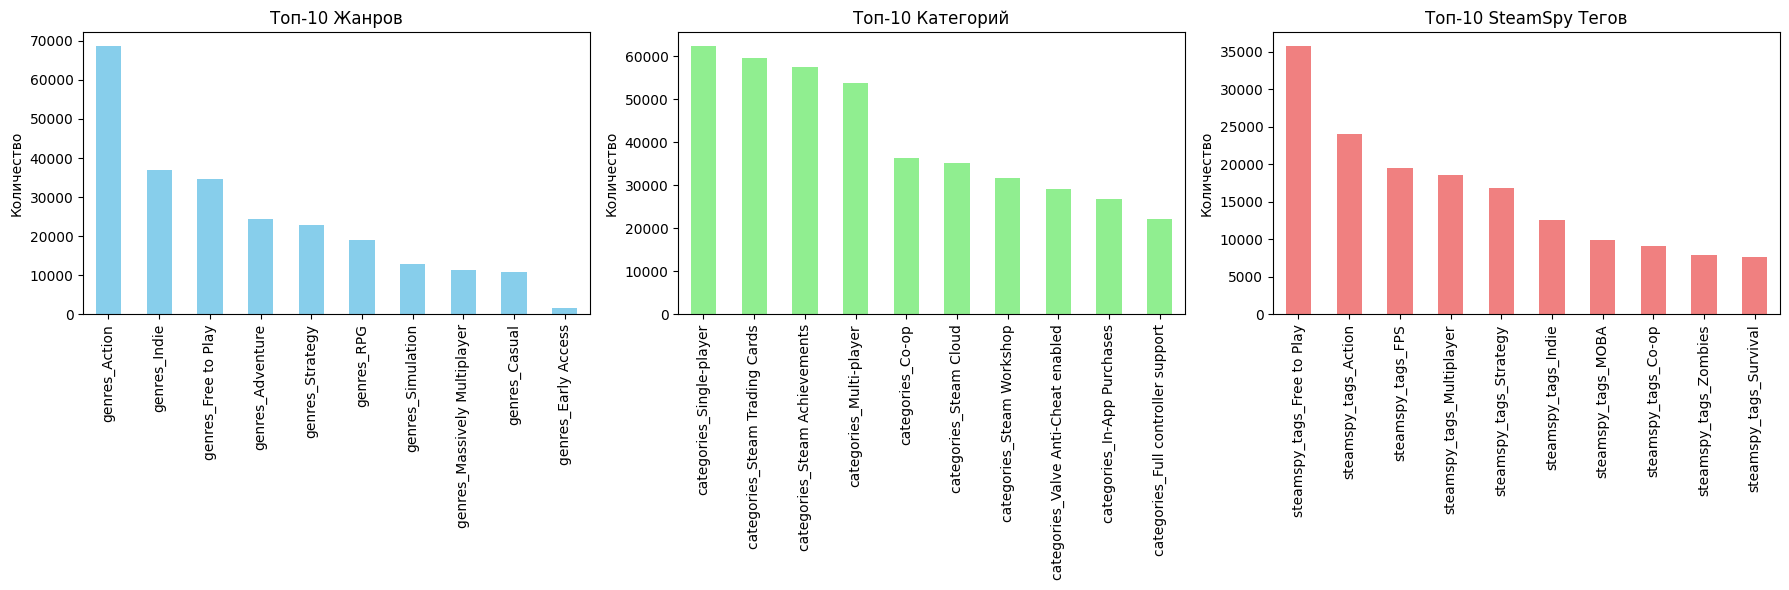

In [36]:
top_genres = df.filter(like='genres_').sum().sort_values(ascending=False).head(10)
top_categories = df.filter(like='categories_').sum().sort_values(ascending=False).head(10)
top_tags = df.filter(like='steamspy_tags_').sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Три подграфика в один ряд

top_genres.plot(kind='bar', ax=axes[0], color='skyblue', title='Топ-10 Жанров')
axes[0].set_ylabel('Количество')

top_categories.plot(kind='bar', ax=axes[1], color='lightgreen', title='Топ-10 Категорий')
axes[1].set_ylabel('Количество')

top_tags.plot(kind='bar', ax=axes[2], color='lightcoral', title='Топ-10 SteamSpy Тегов')
axes[2].set_ylabel('Количество')

plt.tight_layout()
plt.show()

In [40]:
merged_df['steamspy_tags'] = merged_df['steamspy_tags'].astype(str).fillna('')

def preprocess_tags(tags):
    tags = tags.replace(';', ' ')
    return tags


merged_df['processed_tags'] = merged_df['steamspy_tags'].apply(preprocess_tags)


In [42]:
model = SentenceTransformer('all-MiniLM-L6-v2')

c:\Users\ereme\AI_KC\final_PROJECT\mfdp_venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [43]:
tags_list = merged_df['processed_tags'].tolist()

embeddings = model.encode(tags_list, show_progress_bar=True)

embeddings = np.array(embeddings)

Batches:   0%|          | 0/2903 [00:00<?, ?it/s]

In [44]:
embeddings_df = pd.DataFrame(embeddings, index=merged_df.index)


In [45]:
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.067255,0.003303,0.002930,0.037829,0.057094,-0.077055,-0.040479,-0.016083,-0.025729,0.032950,...,0.104069,0.042583,-0.009178,0.070368,0.007443,0.103521,0.042140,-0.117312,-0.062539,-0.043464
1,0.067255,0.003303,0.002930,0.037829,0.057094,-0.077055,-0.040479,-0.016083,-0.025729,0.032950,...,0.104069,0.042583,-0.009178,0.070368,0.007443,0.103521,0.042140,-0.117312,-0.062539,-0.043464
2,-0.022372,0.044861,-0.106019,-0.087355,0.020301,0.021353,0.032338,-0.040591,0.029061,0.072101,...,0.094755,-0.033993,0.026663,-0.016944,0.047111,-0.012638,-0.025165,-0.004415,0.058564,0.027120
3,-0.022372,0.044861,-0.106019,-0.087355,0.020301,0.021353,0.032338,-0.040591,0.029061,0.072101,...,0.094755,-0.033993,0.026663,-0.016944,0.047111,-0.012638,-0.025165,-0.004415,0.058564,0.027120
4,-0.037586,0.050301,-0.025429,-0.006733,0.022865,-0.029515,0.009650,0.001362,-0.013631,-0.037744,...,0.055473,0.000360,0.010929,0.117013,0.002847,0.088507,0.097384,-0.059713,0.022311,-0.034780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,-0.012431,0.006432,0.101855,-0.050167,-0.044628,-0.062809,0.022234,0.001121,-0.082273,-0.023838,...,0.104608,-0.038118,0.014086,0.054297,0.009833,0.104902,-0.014562,-0.068462,-0.061142,-0.002143
92879,0.021986,-0.064556,0.002271,-0.025664,0.043340,0.050421,0.087533,0.016703,-0.074511,0.019678,...,0.081829,0.020219,-0.042860,0.076499,-0.060362,0.003303,0.021018,-0.005141,-0.011912,0.035150
92880,0.000762,-0.007669,-0.041338,-0.030549,-0.029732,0.057745,-0.029783,0.008006,-0.017189,0.009493,...,0.033432,0.114577,-0.000724,-0.014960,-0.027235,-0.010646,-0.040890,-0.048794,-0.042105,0.068125
92881,0.021986,-0.064556,0.002271,-0.025664,0.043340,0.050421,0.087533,0.016703,-0.074511,0.019678,...,0.081829,0.020219,-0.042860,0.076499,-0.060362,0.003303,0.021018,-0.005141,-0.011912,0.035150


In [46]:
X = embeddings_df.values

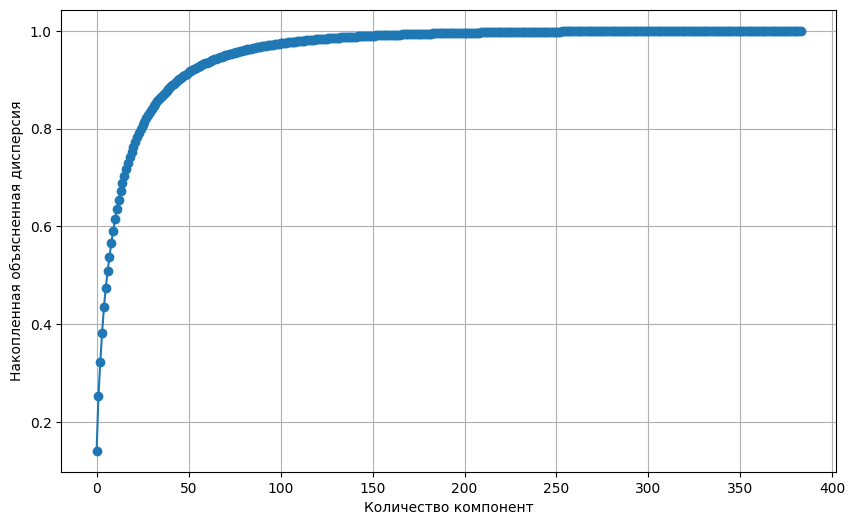

In [47]:
# Инициализируем PCA без указания числа компонент
pca_full = PCA()
pca_full.fit(X)

# Строим график накопленной объясненной дисперсии
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.grid(True)
plt.show()

In [48]:
# Устанавливаем желаемый уровень объясненной дисперсии
explained_variance = 0.95

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= explained_variance) + 1

print(f"Число компонент для сохранения {explained_variance*100}% дисперсии: {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

Число компонент для сохранения 95.0% дисперсии: 72


In [49]:
# Создаем DataFrame с сокращенными эмбеддингами
reduced_columns = [f'pca_emb_{i}' for i in range(n_components)]
embeddings_reduced_df = pd.DataFrame(X_reduced, columns=reduced_columns, index=embeddings_df.index)

In [50]:
embeddings_reduced_df

,pca_emb_0,pca_emb_1,pca_emb_2,pca_emb_3,pca_emb_4,pca_emb_5,pca_emb_6,pca_emb_7,pca_emb_8,pca_emb_9,...,pca_emb_62,pca_emb_63,pca_emb_64,pca_emb_65,pca_emb_66,pca_emb_67,pca_emb_68,pca_emb_69,pca_emb_70,pca_emb_71
0,-0.262794,0.206788,-0.085479,-0.167479,0.126402,0.096169,0.193474,0.076573,0.046117,0.214923,...,-0.020844,-0.024804,-0.018234,-0.029382,-0.034039,-0.026324,-0.049050,-0.010848,-0.014711,-0.004183
1,-0.262794,0.206788,-0.085479,-0.167479,0.126402,0.096169,0.193474,0.076573,0.046117,0.214923,...,-0.020844,-0.024804,-0.018234,-0.029382,-0.034039,-0.026324,-0.049050,-0.010848,-0.014711,-0.004183
2,-0.009643,-0.360546,0.260782,-0.445508,-0.209083,-0.227949,0.049853,-0.013894,-0.083838,-0.070186,...,0.002067,-0.007628,0.002248,-0.010418,-0.000953,-0.004003,0.002356,0.005712,-0.002356,-0.006228
3,-0.009643,-0.360546,0.260782,-0.445508,-0.209083,-0.227949,0.049853,-0.013894,-0.083838,-0.070186,...,0.002067,-0.007628,0.002248,-0.010418,-0.000953,-0.004003,0.002356,0.005712,-0.002356,-0.006228
4,-0.231341,0.139805,-0.053408,-0.067172,-0.070507,0.001339,0.015314,0.057127,-0.000169,0.126977,...,0.098604,-0.097216,0.005425,-0.032563,0.046984,-0.055099,-0.033998,0.046926,0.001126,-0.038606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,-0.236362,0.073910,0.036746,-0.051041,0.103296,-0.031820,0.097507,-0.130857,-0.095453,0.268627,...,-0.022943,-0.044387,0.041985,0.024534,-0.047480,0.071281,0.011827,-0.014460,0.001028,-0.011287
92879,-0.426062,0.160329,-0.289454,0.163296,-0.169882,-0.287707,-0.172575,0.025805,0.011911,0.025693,...,-0.013361,0.017535,0.024029,-0.017387,-0.023622,-0.023959,-0.007218,-0.015568,0.000185,0.015084
92880,-0.271954,-0.029710,0.276213,0.052459,0.299991,0.124153,0.191878,-0.198834,-0.063882,-0.090258,...,0.042750,0.004416,-0.009852,0.009799,0.008580,-0.029629,-0.006310,0.007478,-0.016276,-0.025042
92881,-0.426062,0.160329,-0.289454,0.163296,-0.169882,-0.287707,-0.172575,0.025805,0.011911,0.025693,...,-0.013361,0.017535,0.024029,-0.017387,-0.023622,-0.023959,-0.007218,-0.015568,0.000185,0.015084


In [51]:
df = pd.concat([df, embeddings_reduced_df], axis=1)

In [52]:
df.drop(columns=df.filter(like='steamspy_tags_').columns)

,user_id,action,play_hours,appid,name,release_date,english,developer,publisher,platforms,...,pca_emb_62,pca_emb_63,pca_emb_64,pca_emb_65,pca_emb_66,pca_emb_67,pca_emb_68,pca_emb_69,pca_emb_70,pca_emb_71
0,151603712,purchase,1.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,windows,...,-0.020844,-0.024804,-0.018234,-0.029382,-0.034039,-0.026324,-0.049050,-0.010848,-0.014711,-0.004183
1,151603712,play,87.0,377160,Fallout 4,2015-11-09,1,Bethesda Game Studios,Bethesda Softworks,windows,...,-0.020844,-0.024804,-0.018234,-0.029382,-0.034039,-0.026324,-0.049050,-0.010848,-0.014711,-0.004183
2,151603712,purchase,1.0,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,...,0.002067,-0.007628,0.002248,-0.010418,-0.000953,-0.004003,0.002356,0.005712,-0.002356,-0.006228
3,151603712,play,8.9,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,...,0.002067,-0.007628,0.002248,-0.010418,-0.000953,-0.004003,0.002356,0.005712,-0.002356,-0.006228
4,151603712,purchase,1.0,339800,HuniePop,2015-01-19,1,HuniePot,HuniePot,windows;mac;linux,...,0.098604,-0.097216,0.005425,-0.032563,0.046984,-0.055099,-0.033998,0.046926,0.001126,-0.038606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,128470551,play,1.5,297130,Titan Souls,2015-04-14,1,Acid Nerve,Devolver Digital,windows;mac,...,-0.022943,-0.044387,0.041985,0.024534,-0.047480,0.071281,0.011827,-0.014460,0.001028,-0.011287
92879,128470551,purchase,1.0,38720,RUSH,2010-12-03,1,Two Tribes,Two Tribes Publishing,windows;mac;linux,...,-0.013361,0.017535,0.024029,-0.017387,-0.023622,-0.023959,-0.007218,-0.015568,0.000185,0.015084
92880,128470551,purchase,1.0,844040,RUSH,2018-07-13,1,The Binary Mill,The Binary Mill,windows,...,0.042750,0.004416,-0.009852,0.009799,0.008580,-0.029629,-0.006310,0.007478,-0.016276,-0.025042
92881,128470551,play,1.4,38720,RUSH,2010-12-03,1,Two Tribes,Two Tribes Publishing,windows;mac;linux,...,-0.013361,0.017535,0.024029,-0.017387,-0.023622,-0.023959,-0.007218,-0.015568,0.000185,0.015084


In [53]:
df.drop(columns=['categories', 'genres'], inplace=True)

In [ ]:
import requests
import pandas as pd
import numpy as np
import time

# Функция для получения информации о цене игры из Steam Store API
def fetch_steam_prices(app_ids):
    app_ids_str = ','.join(map(str, app_ids))  # Соединяем ID через запятую
    url = f'http://store.steampowered.com/api/appdetails?appids={app_ids_str}&cc=us&filters=price_overview'
    try:
        response = requests.get(url)
        data = response.json()
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return {}

# Функция для парсинга данных о ценах
def parse_prices(data):
    price_data = []
    for appid, details in data.items():
        if details['success'] and 'price_overview' in details['data']:
            price_info = details['data']['price_overview']
            price_data.append({
                'appid': appid,
                'initial_price': price_info['initial'] / 100,
                'final_price': price_info['final'] / 100,
                'discount_percent': price_info['discount_percent']
            })
        else:
            price_data.append({
                'appid': appid,
                'initial_price': np.nan,
                'final_price': np.nan,
                'discount_percent': np.nan
            })
    return price_data

# Получаем все уникальные item_id из DataFrame
item_ids = df['appid'].unique()

# Список для хранения результатов
price_data = []

# Определяем размер батча
batch_size = 10

# Проходим по item_id батчами
for i in range(0, len(item_ids), batch_size):
    batch = item_ids[i:i + batch_size]
    prices = fetch_steam_prices(batch)
    price_data.extend(parse_prices(prices))
    
    # Задержка для предотвращения превышения лимитов Steam API
    time.sleep(1)

# Преобразуем результат в DataFrame
price_df = pd.DataFrame(price_data)

# Выводим результат
price_df.head()


In [54]:
price_df = pd.read_csv('steam_prices.csv')

In [55]:
price_df.isna().sum()

appid                 0
initial_price       367
final_price         367
discount_percent    367
dtype: int64

In [56]:
df['price'] = price_df['initial_price'].combine_first(df['price'])

In [57]:
string_columns = df.select_dtypes(include=['object']).columns
print(string_columns)

Index(['action', 'name', 'release_date', 'developer', 'publisher', 'platforms',
       'steamspy_tags', 'owners'],
      dtype='object')


In [58]:
#обработка категориальных признаков
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Преобразуем в datetime
df['release_year'] = df['release_date'].dt.year  # Извлекаем год

# 2. Преобразование платформ в бинарные индикаторы
# Если платформа поддерживается, ставим 1, иначе 0
df['platform_windows'] = df['platforms'].apply(lambda x: 1 if 'windows' in x.lower() else 0)
df['platform_mac'] = df['platforms'].apply(lambda x: 1 if 'mac' in x.lower() else 0)
df['platform_linux'] = df['platforms'].apply(lambda x: 1 if 'linux' in x.lower() else 0)

# 3. Преобразование диапазонов пользователей в среднее значение
def parse_owners(owners_range):
    if pd.isna(owners_range):  # Проверяем на NaN
        return np.nan
    # Разбиваем диапазон и считаем среднее
    range_values = owners_range.split('-')
    if len(range_values) == 2:
        low = int(range_values[0].replace(',', ''))
        high = int(range_values[1].replace(',', ''))
        return (low + high) / 2
    else:
        return np.nan  # Если формат не подходит

# Применяем функцию для преобразования колонок 'owners'
df['estimated_owners'] = df['owners'].apply(parse_owners)

# Удаляем старые колонки, которые были преобразованы
df.drop(columns=['platforms', 'release_date', 'owners'], inplace=True)

# Выводим первые строки преобразованного DataFrame
print(df.head())


     user_id    action  play_hours   appid           name  english  \
0  151603712  purchase         1.0  377160      Fallout 4        1   
1  151603712      play        87.0  377160      Fallout 4        1   
2  151603712  purchase         1.0     550  Left 4 Dead 2        1   
3  151603712      play         8.9     550  Left 4 Dead 2        1   
4  151603712  purchase         1.0  339800       HuniePop        1   

               developer           publisher  required_age  \
0  Bethesda Game Studios  Bethesda Softworks            18   
1  Bethesda Game Studios  Bethesda Softworks            18   
2                  Valve               Valve             0   
3                  Valve               Valve             0   
4               HuniePot            HuniePot            18   

                             steamspy_tags  ...  pca_emb_67  pca_emb_68  \
0  Open World;Post-apocalyptic;Exploration  ...   -0.026324   -0.049050   
1  Open World;Post-apocalyptic;Exploration  ...   -0.026

In [59]:
df = df.drop(columns=df.filter(like='steamspy_tags_').columns)

In [60]:
df = df.drop(columns = ['steamspy_tags'], axis=1)

In [61]:
df.columns

Index(['user_id', 'action', 'play_hours', 'appid', 'name', 'english',
       'developer', 'publisher', 'required_age', 'achievements',
       ...
       'pca_emb_67', 'pca_emb_68', 'pca_emb_69', 'pca_emb_70', 'pca_emb_71',
       'release_year', 'platform_windows', 'platform_mac', 'platform_linux',
       'estimated_owners'],
      dtype='object', length=144)

In [62]:
string_columns = df.select_dtypes(include=['object']).columns
print(string_columns)

Index(['action', 'name', 'developer', 'publisher'], dtype='object')


In [63]:
# Группируем данные по 'user_id' и 'appid' и проверяем наличие 'purchase' и 'play'
grouped = df.groupby(['user_id', 'appid'])['action'].apply(lambda x: set(x)).reset_index()

grouped['has_purchase_and_play'] = grouped['action'].apply(lambda x: 'purchase' in x and 'play' in x)

only_purchase = grouped[(grouped['action'].apply(lambda x: 'purchase' in x)) & 
                        (~grouped['action'].apply(lambda x: 'play' in x))]

print(only_purchase.head())  # Показывает случаи, где есть 'purchase', но нет 'play'
print(grouped['has_purchase_and_play'].value_counts())  # Считает случаи, где оба действия есть и где нет


   user_id  appid      action  has_purchase_and_play
0     5250     10  {purchase}                  False
1     5250     20  {purchase}                  False
2     5250     30  {purchase}                  False
3     5250     40  {purchase}                  False
4     5250     60  {purchase}                  False
has_purchase_and_play
True     36300
False    20190
Name: count, dtype: int64


In [64]:
# Фильтруем данные, чтобы учитывать только строки, где action == 'play'
play_data = df[df['action'] == 'play']

# Рассчитываем средние значения play_hours для каждого разработчика и издателя
developer_avg_play_hours = play_data.groupby('developer')['play_hours'].mean().to_dict()
publisher_avg_play_hours = play_data.groupby('publisher')['play_hours'].mean().to_dict()

# Создаем новые колонки для всех строк со средними значениями play_hours, рассчитанными только для action == 'play'
df['developer'] = df['developer'].map(developer_avg_play_hours).fillna(1)  # Заполнение NaN значением 1
df['publisher'] = df['publisher'].map(publisher_avg_play_hours).fillna(1)  # Заполнение NaN значением 1

# Проверяем результат
print(df[['developer', 'publisher']].head())



    developer   publisher
0   55.865366   33.888913
1   55.865366   33.888913
2  127.465523  124.345968
3  127.465523  124.345968
4   20.820000   20.820000


In [66]:
df['action'] = df['action'].map({'play': 1, 'purchase': 2})

In [67]:
# Создаем функцию для агрегирования данных и сбрасываем action
def custom_agg(x):
    d = x.iloc[0]
    d['play_hours'] = x['play_hours'].sum()  
    return d

df_aggregated = df.groupby(['user_id', 'appid']).apply(custom_agg).reset_index(drop=True)

df_aggregated = df_aggregated.drop(columns=['action'])

print(df_aggregated.head())


   user_id  play_hours  appid                   name  english   developer  \
0     5250         1.0     10         Counter-Strike        1  127.465523   
1     5250         1.0     20  Team Fortress Classic        1  127.465523   
2     5250         1.0     30          Day of Defeat        1  127.465523   
3     5250         1.0     40     Deathmatch Classic        1  127.465523   
4     5250         1.0     60               Ricochet        1  127.465523   

    publisher  required_age  achievements  positive_ratings  ...  pca_emb_67  \
0  124.345968             0             0            124534  ...    0.000167   
1  124.345968             0             0              3318  ...    0.000167   
2  124.345968             0             0              3416  ...   -0.008197   
3  124.345968             0             0              1273  ...    0.000167   
4  124.345968             0             0              2758  ...    0.000167   

   pca_emb_68  pca_emb_69  pca_emb_70  pca_emb_71  relea

C:\Users\ereme\AppData\Local\Temp\ipykernel_36660\340989607.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_aggregated = df.groupby(['user_id', 'appid']).apply(custom_agg).reset_index(drop=True)


In [68]:
df = df_aggregated

Для тестирования модели были разделены игры пользователей попалам для каждого пользователя. Игры в которых пользователь проводит больше времени будут в тренировочной выборке, а те, а которых меньше в тесте. Будем проверять способность модели предсказывать данные из теста.  

In [69]:
def split_user_data(user_id, user_data):
    user_data_sorted = user_data.sort_values('play_hours')
    num_games = len(user_data_sorted)
    
    # Проверяем, что у пользователя достаточно игр для разделения
    if num_games >= 2:
        test_size = max(1, num_games // 2)
        train_size = num_games - test_size
        test_data = user_data_sorted.iloc[:test_size]
        train_data = user_data_sorted.iloc[test_size:]
    else:
        test_data = pd.DataFrame(columns=user_data.columns)
        train_data = user_data_sorted
    
    return train_data, test_data

def split_all_users(df):
    user_train_test = {}
    for user_id, user_data in df.groupby('user_id'):
        if len(user_data) >= 2:
            train_data, test_data = split_user_data(user_id, user_data)
            user_train_test[user_id] = {'train': train_data, 'test': test_data}
        else:
            continue 
    return user_train_test

user_train_test = split_all_users(df)



In [113]:
# Собираем все тренировочные данные в один DataFrame
train_data = pd.concat([user_train_test[user]['train'] for user in user_train_test])

# Создаем матрицу взаимодействий (users x items)
user_game_matrix = train_data.pivot_table(index='user_id', columns='appid', values='play_hours', fill_value=0)


In [115]:
# Приводим матрицу к формату numpy array
user_game_matrix_values = user_game_matrix.values

# Инициализируем и обучаем модель KNN
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_game_matrix_values)

NearestNeighbors(algorithm='brute', metric='cosine')

In [116]:
def recommend_knn(user_id, user_game_matrix, knn_model, df_train, top_n=5):
    if user_id not in user_game_matrix.index:
        return []
    
    user_idx = user_game_matrix.index.get_loc(user_id)
    user_vector = user_game_matrix.iloc[user_idx].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=top_n+1)  # +1, чтобы исключить самого пользователя
    
    similar_user_indices = indices.flatten()[1:] 
    similar_users = user_game_matrix.index[similar_user_indices]

    user_games = set(df_train[df_train['user_id'] == user_id]['appid'])
    
    similar_users_games = df[df['user_id'].isin(similar_users)]

    recommendations = similar_users_games[~similar_users_games['appid'].isin(user_games)] 
    
    game_recommendations = recommendations.groupby('appid')['play_hours'].sum()
    
    recommended_games = game_recommendations.nlargest(top_n).index.tolist()
       
    return recommended_games


In [161]:
# Пример рекомендации для пользователя
user_id_example = list(user_game_matrix.index)[0] 
recommended_games = recommend_knn(user_id_example, user_game_matrix, knn, train_data, top_n=5)
print(f"Рекомендованные игры для пользователя {user_id_example}: {recommended_games}")


Рекомендованные игры для пользователя 5250: [49520, 304050, 218620, 230410, 339120]


Для оценки качества рекомендаций используем метрику Mean Average Precision (MAP), Mean Average Recall (MAR) и Mean Average F1 (MAF1) для ста рандомных пользователей.

In [118]:
import random


random_users = random.sample(list(user_game_matrix.index), 300)


In [119]:
def evaluate_recommendations(user_id, recommended_games, user_train_test):
    if 'test' not in user_train_test[user_id] or user_train_test[user_id]['test'].empty:
        return None, None, None  # Нет тестовых данных для оценки
    
    # Получаем список игр из тестового набора пользователя
    user_games = user_train_test[user_id]['test']['appid'].unique()
    if len(user_games) == 0:
        return None, None, None  # Нет игр в тестовом наборе

    # Пересечение рекомендованных игр с тестовыми играми пользователя
    true_positives = set(recommended_games).intersection(set(user_games))
    tp = len(true_positives)
    total_recommended = len(recommended_games)
    total_actual = len(user_games)

    precision = tp / total_recommended if total_recommended > 0 else 0
    recall = tp / total_actual if total_actual > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


In [120]:
# Инициализация списков для хранения метрик
precision_knn, recall_knn, f1_knn = [], [], []
hit_count = 0  # Для Hit Rate@K

for user_id in random_users:
    # Получаем рекомендации для пользователя
    recommended_games = recommend_knn(user_id, user_game_matrix, knn, train_data, top_n=5)

    # Оцениваем рекомендации
    precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

    if precision is not None:
        precision_knn.append(precision)
        recall_knn.append(recall)
        f1_knn.append(f1)
        
        # Обновление Hit Rate
        if len(set(recommended_games).intersection(user_train_test[user_id]['test']['appid'])) > 0:
            hit_count += 1

# Расчёт средних метрик
if len(precision_knn) > 0:
    avg_precision_knn = np.mean(precision_knn)
    avg_recall_knn = np.mean(recall_knn)
    avg_f1_knn = np.mean(f1_knn)
    
    # Hit Rate@K
    hit_rate_knn = hit_count / len(precision_knn)
    
    print(f"KNN - Average Precision: {avg_precision_knn:.4f}")
    print(f"KNN - Average Recall: {avg_recall_knn:.4f}")
    print(f"KNN - Average F1-score: {avg_f1_knn:.4f}")


    
    print(f"KNN - Hit Rate@K: {hit_rate_knn:.4f}")
else:
    print("Не удалось вычислить метрики: недостаточно данных для оценки.")

KNN - Average Precision: 0.1488
KNN - Average Recall: 0.2610
KNN - Average F1-score: 0.1658
KNN - Hit Rate@K: 0.4067


In [124]:
# Матрица взаимодействий пользователей и игр (используем тренировочные данные)
user_game_matrix_sd = train_data.pivot_table(index='user_id', columns='appid', values='play_hours', fill_value=0)

In [125]:
# Транспонируем матрицу, чтобы строки соответствовали играм, а столбцы — пользователям
game_user_matrix_sd = user_game_matrix_sd.T

# Конвертируем DataFrame в numpy array
game_user_numpy = game_user_matrix_sd.values

# Расчет косинусного сходства между играми
item_similarity = cosine_similarity(game_user_numpy)

# Преобразуем результат в DataFrame для удобства использования
item_similarity_df = pd.DataFrame(item_similarity, index=game_user_matrix_sd.index, columns=game_user_matrix_sd.index)




In [128]:
def recommend_item_based(user_id, user_game_matrix, item_similarity_df, df_train, top_n=5):
    if user_id not in user_game_matrix.index:
        print(f"Пользователь {user_id} отсутствует в тренировочных данных.")
        return []
    
    # Получаем игры, в которые пользователь уже играл
    user_games = user_game_matrix.loc[user_id]
    user_games = user_games[user_games > 0].index.tolist()
    
    # Словарь для хранения суммарного сходства
    scores = {}
    for game in user_games:
        # Получаем сходство текущей игры с другими играми
        similar_games = item_similarity_df[game]
        # Проходим по каждой игре и суммируем сходства
        for sim_game, score in similar_games.items():
            if sim_game in user_games:
                continue  # Пропускаем игры, в которые пользователь уже играл
            if sim_game not in scores:
                scores[sim_game] = score
            else:
                scores[sim_game] += score
    
    # Сортируем игры по суммарному сходству
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    recommended_games = [game for game, score in sorted_scores][:top_n]
    
    return recommended_games


In [129]:
# Инициализация списков для хранения метрик
precision_knn, recall_knn, f1_knn = [], [], []
bundle_precision_knn, bundle_recall_knn = [], []
hit_count = 0  # Для Hit Rate@K

for user_id in random_users:
    # Получаем рекомендации для пользователя
    recommended_games = recommend_item_based(user_id, user_game_matrix_sd, item_similarity_df, train_data, top_n=5)

    # Оцениваем рекомендации
    precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

    if precision is not None:
        # Сохранение индивидуальных метрик
        precision_knn.append(precision)
        recall_knn.append(recall)
        f1_knn.append(f1)
        
        # Сохранение Bundle Precision и Bundle Recall
        bundle_precision_knn.append(precision)  # Здесь Bundle Precision аналогичен Precision@K
        bundle_recall_knn.append(recall)        # Здесь Bundle Recall аналогичен Recall@K
        
        # Обновление Hit Rate
        if len(set(recommended_games).intersection(user_train_test[user_id]['test']['appid'])) > 0:
            hit_count += 1

# Расчёт средних метрик
if len(precision_knn) > 0:
    avg_precision_knn = np.mean(precision_knn)
    avg_recall_knn = np.mean(recall_knn)
    avg_f1_knn = np.mean(f1_knn)
    
    # Bundle Precision@K и Bundle Recall@K
    avg_bundle_precision_knn = np.mean(bundle_precision_knn)
    avg_bundle_recall_knn = np.mean(bundle_recall_knn)
    
    # Hit Rate@K
    hit_rate_knn = hit_count / len(precision_knn)
    
    print(f"Item-Based CF - Average Precision: {avg_precision_knn:.4f}")
    print(f"Item-Based CF - Average Recall: {avg_recall_knn:.4f}")
    print(f"Item-Based CF - Average F1-score: {avg_f1_knn:.4f}")
    print(f"Item-Based CF - Hit Rate@K: {hit_rate_knn:.4f}")
else:
    print("Не удалось вычислить метрики: недостаточно данных для оценки.")

Item-Based CF - Average Precision: 0.0333
Item-Based CF - Average Recall: 0.0486
Item-Based CF - Average F1-score: 0.0321
Item-Based CF - Hit Rate@K: 0.1533


In [130]:

# Подготовка данных для библиотеки Surprise
reader = Reader(rating_scale=(0, train_data['play_hours'].max()))
data = Dataset.load_from_df(train_data[['user_id', 'appid', 'play_hours']], reader)

# Разделение данных на тренировочные и тестовые
trainset = data.build_full_trainset()

In [131]:
# обучение модели SVD
svd_model = SVD()
svd_model.fit(trainset)


In [132]:
def recommend_svd(user_id, svd_model, df_train, top_n=5):
    all_games = df_train['appid'].unique()
    user_games = set(df_train[df_train['user_id'] == user_id]['appid'])
    games_to_predict = [game for game in all_games if game not in user_games]
    
    predictions = [svd_model.predict(user_id, game) for game in games_to_predict]
    predictions.sort(key=lambda x: x.est, reverse=True)
    recommended_games = [pred.iid for pred in predictions[:top_n]]
    return recommended_games


In [133]:
# Инициализация списков для хранения метрик
precision_knn, recall_knn, f1_knn = [], [], []
bundle_precision_knn, bundle_recall_knn = [], []
hit_count = 0  # Для Hit Rate@K

for user_id in random_users:
    # Получаем рекомендации для пользователя
    recommended_games = recommend_svd(user_id, svd_model, train_data, top_n=5)

    # Оцениваем рекомендации
    precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

    if precision is not None:
        # Сохранение индивидуальных метрик
        precision_knn.append(precision)
        recall_knn.append(recall)
        f1_knn.append(f1)
        
        # Сохранение Bundle Precision и Bundle Recall
        bundle_precision_knn.append(precision)  # Здесь Bundle Precision аналогичен Precision@K
        bundle_recall_knn.append(recall)        # Здесь Bundle Recall аналогичен Recall@K
        
        # Обновление Hit Rate
        if len(set(recommended_games).intersection(user_train_test[user_id]['test']['appid'])) > 0:
            hit_count += 1

# Расчёт средних метрик
if len(precision_knn) > 0:
    avg_precision_knn = np.mean(precision_knn)
    avg_recall_knn = np.mean(recall_knn)
    avg_f1_knn = np.mean(f1_knn)
    
    # Bundle Precision@K и Bundle Recall@K
    avg_bundle_precision_knn = np.mean(bundle_precision_knn)
    avg_bundle_recall_knn = np.mean(bundle_recall_knn)
    
    # Hit Rate@K
    hit_rate_knn = hit_count / len(precision_knn)
    
    print(f"SVD - Average Precision: {avg_precision_knn:.4f}")
    print(f"SVD - Average Recall: {avg_recall_knn:.4f}")
    print(f"SVD - Average F1-score: {avg_f1_knn:.4f}")
    print(f"SVD - Hit Rate@K: {hit_rate_knn:.4f}")
else:
    print("Не удалось вычислить метрики: недостаточно данных для оценки.")

SVD - Average Precision: 0.0593
SVD - Average Recall: 0.1095
SVD - Average F1-score: 0.0591
SVD - Hit Rate@K: 0.2500


In [134]:
import optuna
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Оставляем предыдущие функции split_user_data и split_all_users

# Определяем целевую функцию для Optuna
def objective(trial, random_users=random_users):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    metric = trial.suggest_categorical('metric', ['cosine', 'euclidean', 'manhattan'])
    algorithm = trial.suggest_categorical('algorithm', ['brute', 'auto'])

    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm=algorithm)
    knn_model.fit(user_game_matrix_values)  # user_game_matrix_values - матрица взаимодействий

    precision_knn, recall_knn, f1_knn = [], [], []
    
    for user_id in random_users:

        recommended_games = recommend_knn(user_id, user_game_matrix, knn_model, train_data, top_n=5)


        precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

        if precision is not None:
            precision_knn.append(precision)
            recall_knn.append(recall)
            f1_knn.append(f1)


    if len(precision_knn) == 0:
        return 1e9

    avg_f1_knn = np.mean(f1_knn)
    return -avg_f1_knn  # Оптимизируем максимизацию F1-score

# Запускаем Optuna для оптимизации KNN
study = optuna.create_study(direction='minimize')  # Мы максимизируем F1-score, но используем минус
study.optimize(objective, n_trials=50)

# Лучшие гиперпараметры
print(f"Лучшие гиперпараметры: {study.best_params}")
print(f"Наилучший F1-score: {-study.best_value}")

# Применяем лучшие гиперпараметры для KNN
best_knn_model = NearestNeighbors(
    n_neighbors=study.best_params['n_neighbors'],
    metric=study.best_params['metric'],
    algorithm=study.best_params['algorithm']
)
best_knn_model.fit(user_game_matrix_values)

precision_knn, recall_knn, f1_knn = [], [], []
bundle_precision_knn, bundle_recall_knn = [], []
hit_count = 0  # Для Hit Rate@K

for user_id in random_users:
    # Получаем рекомендации для пользователя
    recommended_games = recommend_knn(user_id, user_game_matrix, best_knn_model, train_data, top_n=5)

    # Оцениваем рекомендации
    precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

    if precision is not None:
        # Сохранение индивидуальных метрик
        precision_knn.append(precision)
        recall_knn.append(recall)
        f1_knn.append(f1)
        
        # Сохранение Bundle Precision и Bundle Recall
        bundle_precision_knn.append(precision)  # Здесь Bundle Precision аналогичен Precision@K
        bundle_recall_knn.append(recall)        # Здесь Bundle Recall аналогичен Recall@K
        
        # Обновление Hit Rate
        if len(set(recommended_games).intersection(user_train_test[user_id]['test']['appid'])) > 0:
            hit_count += 1

# Расчёт средних метрик
if len(precision_knn) > 0:
    avg_precision_knn = np.mean(precision_knn)
    avg_recall_knn = np.mean(recall_knn)
    avg_f1_knn = np.mean(f1_knn)
    
    # Bundle Precision@K и Bundle Recall@K
    avg_bundle_precision_knn = np.mean(bundle_precision_knn)
    avg_bundle_recall_knn = np.mean(bundle_recall_knn)
    
    # Hit Rate@K
    hit_rate_knn = hit_count / len(precision_knn)
    
    print(f"KNN - Average Precision: {avg_precision_knn:.4f}")
    print(f"KNN - Average Recall: {avg_recall_knn:.4f}")
    print(f"KNN - Average F1-score: {avg_f1_knn:.4f}")


    
    print(f"KNN - Hit Rate@K: {hit_rate_knn:.4f}")
else:
    print("Не удалось вычислить метрики: недостаточно данных для оценки.")

[I 2024-10-01 22:19:56,448] A new study created in memory with name: no-name-abf730dd-9add-4211-8676-42c110b1425f
[I 2024-10-01 22:20:10,628] Trial 0 finished with value: -0.16581951283488017 and parameters: {'n_neighbors': 7, 'metric': 'cosine', 'algorithm': 'auto'}. Best is trial 0 with value: -0.16581951283488017.
[I 2024-10-01 22:20:24,473] Trial 1 finished with value: -0.16581951283488017 and parameters: {'n_neighbors': 7, 'metric': 'cosine', 'algorithm': 'brute'}. Best is trial 0 with value: -0.16581951283488017.
[I 2024-10-01 22:20:26,422] Trial 2 finished with value: -0.16039132753972085 and parameters: {'n_neighbors': 13, 'metric': 'manhattan', 'algorithm': 'auto'}. Best is trial 0 with value: -0.16581951283488017.
[I 2024-10-01 22:20:29,290] Trial 3 finished with value: -0.15279804764972862 and parameters: {'n_neighbors': 20, 'metric': 'euclidean', 'algorithm': 'brute'}. Best is trial 0 with value: -0.16581951283488017.
[I 2024-10-01 22:20:32,292] Trial 4 finished with value:

Лучшие гиперпараметры: {'n_neighbors': 7, 'metric': 'cosine', 'algorithm': 'auto'}
Наилучший F1-score: 0.16581951283488017
KNN - Average Precision: 0.1488
KNN - Average Recall: 0.2610
KNN - Average F1-score: 0.1658
KNN - Hit Rate@K: 0.4067


In [139]:
features = train_data.drop(columns=['user_id','appid', 'name'])
features = features.fillna(0)
pca_columns = [col for col in features.columns if col.startswith('pca_')]
other_columns = [col for col in features.columns if not col.startswith('pca_')]

from sklearn.preprocessing import StandardScaler, normalize

scaler_other = StandardScaler()
other_features_scaled = scaler_other.fit_transform(features[other_columns])

pca_features_normalized = normalize(features[pca_columns])

features_combined = np.hstack([other_features_scaled, pca_features_normalized])

combined_columns = other_columns + pca_columns

features_scaled_df = pd.DataFrame(features_combined, columns=combined_columns, index=train_data['appid'])

features_scaled_df = features_scaled_df[~features_scaled_df.index.duplicated(keep='first')]

from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
item_similarity_matrix = cosine_similarity(features_scaled_df)

item_similarity_df = pd.DataFrame(
    item_similarity_matrix,
    index=features_scaled_df.index,
    columns=features_scaled_df.index
)


In [145]:
def recommend_knn_with_item_similarity(user_id, user_game_matrix, knn_model, df_train, item_similarity_df, top_n=5):
    if user_id not in user_game_matrix.index:
        print(f"Пользователь {user_id} отсутствует в тренировочных данных.")
        return []
    
    user_vector = user_game_matrix.loc[user_id].values.reshape(1, -1)
    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=top_n+1)
    similar_user_indices = indices.flatten()[1:]
    similar_users = user_game_matrix.index[similar_user_indices]
    
    user_games = set(df_train[df_train['user_id'] == user_id]['appid'])
    
    if not user_games:
        # возращаем самые популярные игры
        return list(df_train['appid'].value_counts().head(top_n).index)
    
    similar_users_games = df_train[df_train['user_id'].isin(similar_users)]

    candidate_games = set(similar_users_games['appid']) - user_games
    
    game_scores = {}
    for appid in candidate_games:
        similarities = item_similarity_df.loc[appid].reindex(user_games)
        similarities = similarities.fillna(0)
        average_similarity = similarities.mean()
        game_scores[appid] = average_similarity
    
    recommended_games = sorted(game_scores, key=game_scores.get, reverse=True)[:top_n]
    if not recommended_games:
        return list(df_train['appid'].value_counts().head(top_n).index)
    
    return recommended_games

In [146]:
precision_knn, recall_knn, f1_knn = [], [], []
hit_count = 0  # Для Hit Rate@K

for user_id in random_users:
    # Получаем рекомендации для пользователя
    recommended_games = recommend_knn_with_item_similarity(user_id, user_game_matrix, best_knn_model, train_data, item_similarity_df, top_n=5)

    # Оцениваем рекомендации
    precision, recall, f1 = evaluate_recommendations(user_id, recommended_games, user_train_test)

    if precision is not None:
        # Сохранение индивидуальных метрик
        precision_knn.append(precision)
        recall_knn.append(recall)
        f1_knn.append(f1)
        
        # Сохранение Bundle Precision и Bundle Recall
        bundle_precision_knn.append(precision)  # Здесь Bundle Precision аналогичен Precision@K
        bundle_recall_knn.append(recall)        # Здесь Bundle Recall аналогичен Recall@K
        
        # Обновление Hit Rate
        if len(set(recommended_games).intersection(user_train_test[user_id]['test']['appid'])) > 0:
            hit_count += 1

# Расчёт средних метрик
if len(precision_knn) > 0:
    avg_precision_knn = np.mean(precision_knn)
    avg_recall_knn = np.mean(recall_knn)
    avg_f1_knn = np.mean(f1_knn)
    
    # Bundle Precision@K и Bundle Recall@K
    avg_bundle_precision_knn = np.mean(bundle_precision_knn)
    avg_bundle_recall_knn = np.mean(bundle_recall_knn)
    
    # Hit Rate@K
    hit_rate_knn = hit_count / len(precision_knn)
    
    print(f"KNN - Average Precision: {avg_precision_knn:.4f}")
    print(f"KNN - Average Recall: {avg_recall_knn:.4f}")
    print(f"KNN - Average F1-score: {avg_f1_knn:.4f}")


    
    print(f"KNN - Hit Rate@K: {hit_rate_knn:.4f}")
else:
    print("Не удалось вычислить метрики: недостаточно данных для оценки.")

KNN - Average Precision: 0.0829
KNN - Average Recall: 0.1624
KNN - Average F1-score: 0.0848
KNN - Hit Rate@K: 0.2967


In [148]:
# Выбираем верхний треугольник матрицы, чтобы избежать повторений (симметричная матрица)
similarity_values = item_similarity_df.where(np.triu(np.ones(item_similarity_df.shape), k=1).astype(bool))

similarity_values = similarity_values.stack()

print("Базовая статистика значений сходства:")
print(similarity_values.describe())

Базовая статистика значений сходства:
count    1.280800e+06
mean     1.808971e-01
std      2.163042e-01
min     -5.371954e-01
25%      2.232309e-02
50%      1.533320e-01
75%      3.201903e-01
max      9.999999e-01
dtype: float64


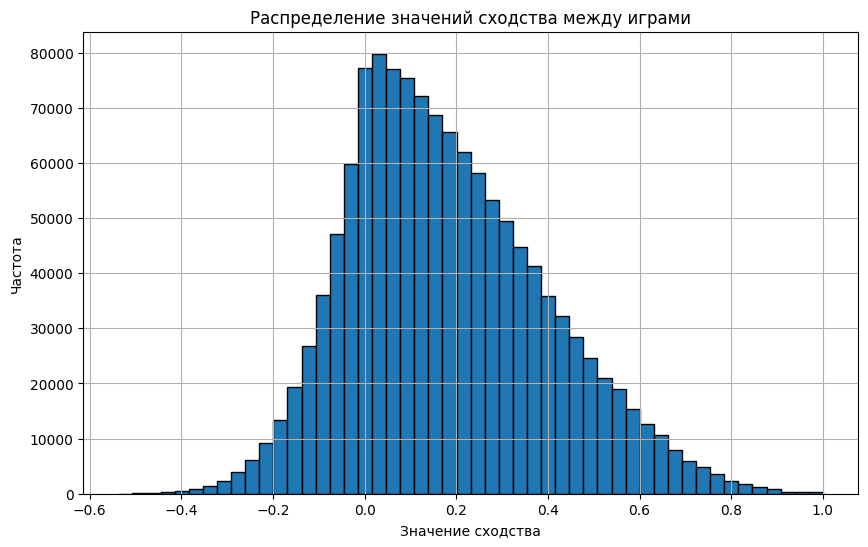

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(similarity_values, bins=50, edgecolor='black')
plt.title('Распределение значений сходства между играми')
plt.xlabel('Значение сходства')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


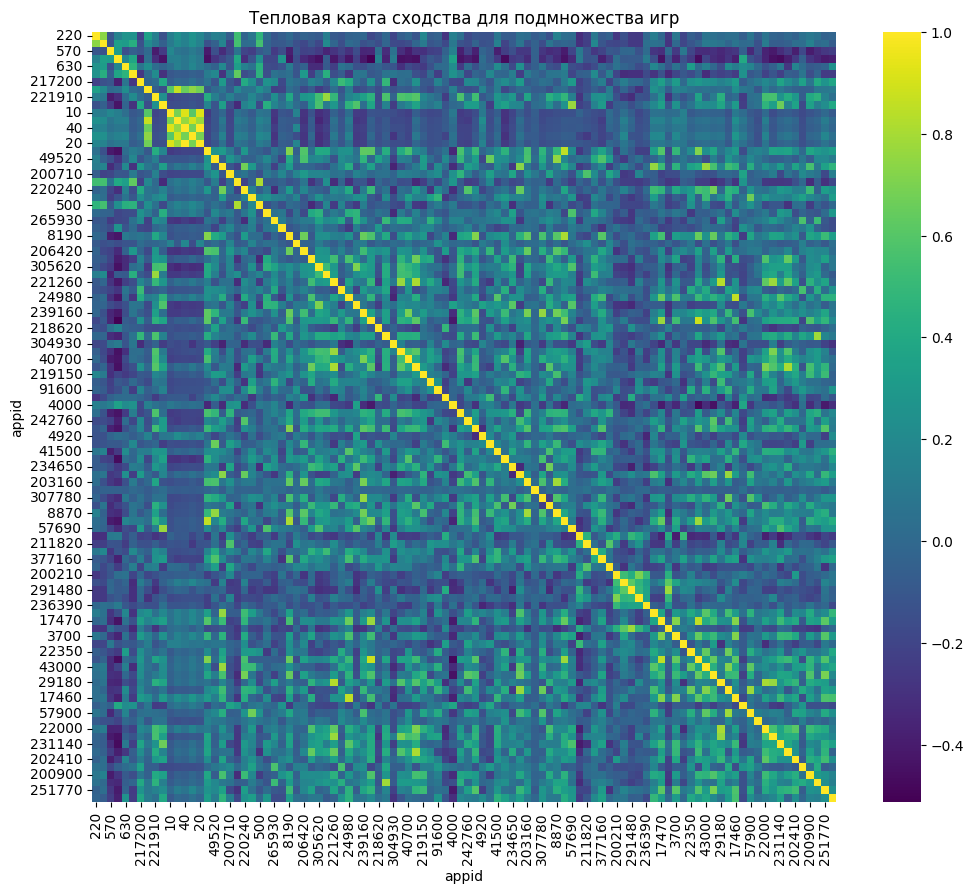

In [150]:
import seaborn as sns

# Выбираем подмножество игр (например, первые 50 игр)
subset_appids = item_similarity_df.index[:100]

# Извлекаем соответствующую матрицу сходства
subset_similarity = item_similarity_df.loc[subset_appids, subset_appids]

# Построение тепловой карты
plt.figure(figsize=(12,10))
sns.heatmap(subset_similarity, cmap='viridis')
plt.title('Тепловая карта сходства для подмножества игр')
plt.show()


In [152]:
# Вычисляем процент пар с высоким сходством (например, > 0.5)
high_similarity_count = (similarity_values > 0.5).sum()
total_pairs = len(similarity_values)
high_similarity_percentage = (high_similarity_count / total_pairs) * 100

print(f"Процент пар игр с сходством > 0.5: {high_similarity_percentage:.2f}%")


Процент пар игр с сходством > 0.5: 8.89%
